<div>
  <a href = "https://github.com/IsaacFMendes"><img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" target="_blank"></a>
  <a href="https://www.linkedin.com/in/isaacfernandesmendes/" target="_blank"><img src="https://img.shields.io/badge/-LinkedIn-%230077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank"></a>
  <a></a>
  <a href="https://medium.com/@isaac_fmendes" target="_blank"><img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white"></a>
</div>


# Detecção de Fraudes em Cartões de Crédito utilizando Regressão Logística como modelo de Machine Learning

Criado por [Isaac Fernandes Mendes](https://www.linkedin.com/in/isaacfernandesmendes/)


## Introdução

O uso do cartão de crédito tornou -se uma ferramenta cotidiana e essencial para todos nós. Antes considerado um item de luxo por alguns, hoje seu uso já faz parte da rotina da população. Pode-se perceber sua utilização desde de compras em lojas físicas ou online, até em aplivativos de transportes (Uber), comida(Ifood) e streaming (Netflix, Amazon Prime). De acordo com a FEBRABAN - Federação Brasileira de Bancos Brasileiros, as operações com cartão de crédito chegaram a um número de 18,2 bilhões de transações. Esse fato fez com que o uso do cartão crédito ,como meio de pagamento, ficasse atrás apenas do Pix com um número de 24,1 bilhão de transações. Diante disso, é preciso tomar cuidado com seu uso, pois existem vários criminosos que aproveitam a sua comodidade para aplicar golpes visando lucro. Importante mencionar, que hoje, a maioria das fraudes com cartão acontece por meio virtual, possibilitando ao fraudador o acesso aos dados do titular do cartão. Essas fraudes são de bastante relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

<p align=center>
<img src="https://img.freepik.com/vetores-gratis/dados-globais-ou-seguranca-de-dados-pessoais-conceito-online-de-seguranca-de-dados-ciberneticos-ideia-de-privacidade-e-protecao-de-informacoes-ou-seguranca-da-internet-ilustracao-isometrica-plana-isolada_1150-39291.jpg?w=1380&t=st=1689375691~exp=1689376291~hmac=11713fffacb0ba34c433d5a4fd48aa6ab318621ee2d63582d38442abf506221b" width="80%"></p>


Sabendo de tudo isso, as instituições financeiras estão investindo cada vez mais em tecnologia na área de machine learning. Pois, ela é capaz de, a partir de uma grande quantidade de dados, analisá-los, aprender com eles e oferecer previsões para a tomada de decisões de forma autônoma - ou seja, sem precisar da interferência de uma pessoa.

Tendo isso em vista, neste projeto utilizarei a técnica de **Regressão Logística** para treinar um modelo preditivo que seja capaz de aprender e identificar quando houver uma transação fraudulenta ou não. Ela é recomendada para situações em que a variável dependente é de natureza dicotômica ou binária, estimando a probabilidade associada à ocorrência de determinado evento em face de um conjunto de varáveis explanatórias. Suas principais vantagens são:

* Facilidade para lidar com variáveis independentes categóricas.
* Fornecer resultados em termos de probabilidade.
* Facilidade de classificação de indivíduos em categorias.
* Requer pequeno número de suposições.
* Possui alto grau de confiabilidade.

Vale salientar, que o objetivo final é obter um modelo de predição com uma boa detecção de fraudes (verdadeiro positivo -VP), sem alterar muito as constatações de transações genuínas (verdadeiro negativo - VN). Isso quando forem comparados os valores preditivos com os originais.

## Conjunto de Dados

 **Dataset Credit Card Fraud Detection:** [Veja o site do dataset deste projeto.](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

 Os dados para esse projeto foram coletados no Kaggle, disponibilizados por algumas empresas europeias de cartão de crédito. Neles contém transações de clientes titulares obtidos durante 2 dias no mês de setembro do ano de 2013.
Tendo 0.173% de transações fraudulentas dentre 284.807 genuínas. Outro detalhe interessante, é que esses dados seguem as regulamentações da GDPR - General Data Protection Regulation, traduzida em português, como Regulamento Geral de Proteção de Dados. Nelas, estão estabelecidas um conjunto de regras que têm com força de lei e servem para normatizar as práticas de uso de informações consideradas adequadas no ambiente eletrônico. Por isso, as features são todas numéricas, e foram descaracterizadas usando uma transformação conhecida como PCA - Análise de Componentes Principais . Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$. Importante mencionar, que apenas as variáveis independentes ``Time`` (Tempo) e ``Amount`` (quantia gasta) estão disponíveis sem essa transformação, além das classificações de ``fraude (1)`` e ``não fraude (0)`` da coluna ``Class`` (varíavel dependente ou alvo).



### Dicionário de Variáveis


* **Time:** Segundos entre cada transação;  

* **Amount:** Valor da transação;  

* **V1-V28:** Variáveis ocultas por questão de privacidade;  


 ### Importando as Bibliotecas Necessárias

In [ ]:
# importando as bibliotecas necessárias
!pip install scikit-plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scikitplot as skplt
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

from imblearn.under_sampling import RandomUnderSampler
from time import perf_counter

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Configurando seaborn (Matriz de Confusão)
sns.set_theme(context = 'notebook', style='whitegrid',palette='muted')

ERROR: Operation cancelled by user


## Importando os Dados

 Foi montado um google drive para colocar o arquivo ``csv`` baixado do Kaggle. Em seguida, realizou-se a importação dos dados para este notebook colab, onde foi visualizado as 5 primeiras linhas do dataset.

In [ ]:
# Importando o arquivo - dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSNP/Projeto_Fraude_Cartao/Arquivo/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Análise Exploratória

Começando a análise exploratória dos dados, primeiramente foi visto o tamanho do data frame original, cuja suas dimensões eram
284.807 linhas e 31 colunas. Segundamente, foi averiguado o formato das variáveis. Nessa ação, observou-se que a maioria são do tipo ``float``, com exceção da ``class`` que trata-se de uma feature com característica binária classificatória.

In [ ]:
# Tamanho do dataframe

df_original = df.shape
print("Dimensões do conjunto original:{}".format(df_original ))

Dimensões do conjunto original:(284807, 31)


In [ ]:
# Criando um novo Dataframe com as dimensões do dataset original

dim = {"Conjunto":["Original"], "Linhas": [284807], "Colunas": [31]}

orig = pd.DataFrame(dim)
orig = orig.set_index("Conjunto")
orig

,Linhas,Colunas
Conjunto,,
Original,284807,31


In [ ]:
# Verificando as informações de cada atributo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Nesse momento, optou-se por fazer um resumo estastístico apenas das variáveis ``Time``(registro em segundos que se passaram entre cada transação) e ``Amount``(quantidade da transação em Euros) já que as features  $[V1, V2, V3 \dots, V28]$ tinham passadas pela transformação PCA e a ``Class`` tratava-se de uma classificação binária. Deste modo, em relação a quantidade da transação, foi resgistrado uma média de 88,35€, uma mediana de 22,00€ e um desvio padrão de 250,12€. Com destaque para a maior transação (max) de 25691,16€. Importante registrar, que a maioria das transaçãoes tratavam -se de valores menores, resultado esse já esperado.

In [ ]:
# Resumo Estatístico
df[["Time","Amount"]].describe().round(2)

,Time,Amount
count,284807.00,284807.00
mean,94813.86,88.35
std,47488.15,250.12
min,0.00,0.00
25%,54201.50,5.60
50%,84692.00,22.00
75%,139320.50,77.16
max,172792.00,25691.16


Dando continuidade, foi examinado se havia valores ausentes no data frame. Entretanto, não houve constatação.

In [ ]:
# Verificando se há valores ausentes

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 Apesar de não existirem valores ausentes, percebe-se que há linhas com valores ``0`` nas colunas ``Time`` e ``Amount``.
 No caso, 2 para primeira e 1825 para a segunda.
 ``OBS: Valores zeros da coluna Class apesar de estarem sendo contabilizados, não estão sendo levados em consideração no momento, pois trata-se de um item classificatório estudado na variável alvo``.

In [ ]:
# Contando as linhas zeradas

df.isin([0]).sum()

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64

Ao observar esses valores zerados ,em porcentagem, nota-se que eles são considerados desprezíveis quando comparamos com o tamanho do data set. Pois, ambas as variáveis possuem menos de 1% com valores iguais a zero.

In [ ]:
# Definindo ,em porcentagem, a quatidade de zeros para o atributo "Time" e "Amount"

perc_time = (2*100) / (len(df))
perc_amount = (1825*100) / (len(df))
aux = {"Time(%)": [perc_time], "Amount(%)":[perc_amount]}

percentagem = pd.DataFrame(aux)
percentagem.round(3)

,Time(%),Amount(%)
0,0.001,0.641


Com relação ao atributo, ``Time`` preferiu-se excluí-lo por não ser trabalhado nessa análise exploratória.

In [ ]:
# Excluindo a coluna Time

df = df.drop(columns = ["Time"], axis =1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dando andamento na análise exploratória, decidiu-se visualizar o comportamento dos valores das transações fraudulentas e normais de maneira separada. Para isso, foi feito o uso do gráfico de dispersão. Nessa ocasião, percebeu-se que a maioria das transações normais se concentrava próximo de 2500€ (Euros). Além disso, seu maior valor foi de 25,69116K€. Já em relação as fraudulentas, foi possível perceber que todas elas foram num valor baixo em comparação com as genuínas, onde seu maior valor foi de 2125,87€.

In [ ]:
# Criando um gráfico de dispersão para as transações normais

n_quantidade = df.query("Class==0").index

fig = px.scatter(df.query("Class==0"),x ='Amount',y = n_quantidade, height=400,
                width=600,
                title = '<b>Distribuição de Valores de Transações Normais</b>',
                color_discrete_sequence=["rgb(93,105,177)"],
                template='plotly_white')

fig.update_layout(xaxis_title='<b>Valor da Transação (em €)</b>',
                  yaxis_title='<b>Número da Transação</b>')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Criando um gráfico de dispersão para as transações fraudulentas

n_quantidade = df.query("Class==1").index

fig = px.scatter(df.query("Class==1"),x ='Amount',y = n_quantidade, height=400,
                width=600,
                color_discrete_sequence=["rgb(217,95,2)"],
                template='plotly_white',
                title = 'Distribuição de Valores de Transações Fraudulentas')

fig.update_layout(xaxis_title='<b>Valor da Transação (em €)</b>',
                  yaxis_title='<b>Número da Transação</b>')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Separando os Dados entre **Teste**, **Treino** e **Validação**.

Na constução de um modelo em machine learning existe um fenômeno denominado Data Leakage, ou em português Vazamentos de Dados. Esse, é visto como um dos pontos de vigilância mais importantes que deve-se ter ao projetar modelos preditivos. Ele ocorre quando os dados que você está usando para treinar um algoritmo de aprendizagem de máquina têm as informações que você está tentando prever. Vale a pena destacar, que uma das formas disso acontecer é por meio do vazamento de dados do conjunto de teste para o conjunto de treinamento. Por isso ,de forma preventiva, foram feitas as separações necessárias entre os dados de teste, treino e validação antes da fase de Pré- Processamento dos dados. Sendo distribuídos em conjuntos com as seguintes dimensões  respectivamente (linhas, colunas):

* Dimensões do conjunto de **teste** = (42721, 30)
* Dimensões do conjunto de **treino** = (205773, 30)
* Dimensões do conjunto de **validação** = (36313, 30)

``OBS: Os três conjuntos ficaram com 30 colunas, porque foi excluída a feature Time na parte da análise exploratória.``

In [ ]:
# Criando um conjunto de teste
df_teste = df.sample(frac=0.15, random_state=0)
print("Dimensões do conjunto de teste:{}".format(df_teste.shape))

# Conjunto de Treino (drop das linhas de teste)
df_treino = df.drop(df_teste.index)

# Realizando o split (Treino e Validação)
# 1° Separando as labels da varíavel alvo (X,y)
X = df_treino.drop("Class", axis=1)
y = df_treino["Class"]

# 2° Dividir os dados entre treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.15,random_state = 42 ,stratify=y, shuffle=True)

dados_treino = pd.concat([X_train,y_train], axis=1)
print("Dimensões do conjunto de treino:{}".format(dados_treino.shape))

dados_validacao = pd.concat([X_val,y_val], axis=1)
print("Dimensões do conjunto de validação:{}".format(dados_validacao.shape))

Dimensões do conjunto de teste:(42721, 30)
Dimensões do conjunto de treino:(205773, 30)
Dimensões do conjunto de validação:(36313, 30)


In [ ]:
# Criando data frame com as dimensões do conjunto de Teste, Treino, Validação e Original
dimensoes = {"Conjunto": ["Teste","Treino","Validação", "Original"], "Linha": [42721,205773,36313,284807], "Coluna": [30, 30, 30, 31]}

df_dimensoes = pd.DataFrame(dimensoes)
df_dimensoes = df_dimensoes.set_index("Conjunto")
df_dimensoes

,Linha,Coluna
Conjunto,,
Teste,42721,30
Treino,205773,30
Validação,36313,30
Original,284807,31


## Pré Processamento

### Substituição dos valores zeros da coluna "Amount" pela média de cada conjunto.

Você acha que transações com valores zeros são recorrentes nas instituições financeiras? Se sua resposta foi não, acertou! Pois, parando pra analisar um pouco os dados zerados, constata-se que não faz nenhum sentido ter transações de cartão de crédito com esses valores (``Amount == 0``). Por isso, poderia optar pela sua exclusão, no entanto com o objetivo de não deletar  os dados das demais features existentes em cada linha com transação zero na variável ``Amount``, foi decidido substituí-los pela média dessa coluna. Importante mencionar, que essa ação foi realizada em cada conjunto de maneira separada. Visto que, se fosse feita de forma agrupada resultaria em vazamentos de dados devido ao fato da média ser do dataset original (treino + teste + validação).  
 A seguir ,na tabela abaixo, podem ser visualizadas que após o procedimento realizado não há transações zeradas:  

In [ ]:
# (CONJUNTO DE TESTE) - Transformando os valores nulos (Amount==0) em ausentes (Amount== NAN)

df_teste.loc[df["Amount"] == 0.0, "Amount"] = np.NAN
# Verificando a média do atributo Amount
media_tr = df_teste["Amount"].mean()
# Substituindo os valores NAN pela média calculada
df_teste["Amount"] = df_teste["Amount"].fillna(media_tr)
total_zeros_amount = df_teste.isnull().sum()[['Amount']]
print("(DADOS DE TESTES) Quantidade de zeros no atributo {} ".format(total_zeros_amount))

# (CONJUNTO DE TREINO)Transformando os valores nulos (Amount==0) em ausentes (Amount== NAN)

dados_treino.loc[df["Amount"] == 0.0, "Amount"] = np.NAN
# Verificando a média do atributo Amount
media_tr = dados_treino["Amount"].mean()
# Substituindo os valores NAN pela média calculada
dados_treino["Amount"] = dados_treino["Amount"].fillna(media_tr)
total_zeros_amount = df_teste.isnull().sum()[['Amount']]
print("(DADOS DE TREINO) Quantidade de zeros no atributo {} ".format(total_zeros_amount))

# (CONJUNTO DE VALIDAÇÃO) -Transformando os valores nulos (Amount==0) em ausentes (Amount== NAN)

dados_validacao.loc[df["Amount"] == 0.0, "Amount"] = np.NAN
# Verificando a média do atributo Amount
media_tr = dados_validacao["Amount"].mean()
# Substituindo os valores NAN pela média calculada
dados_validacao["Amount"] =dados_validacao["Amount"].fillna(media_tr)
total_zeros_amount = df_teste.isnull().sum()[['Amount']]
print("(DADOS DE VALIDAÇÂO) Quantidade de zeros no atributo {} ".format(total_zeros_amount))

(DADOS DE TESTES) Quantidade de zeros no atributo Amount    0
dtype: int64 
(DADOS DE TREINO) Quantidade de zeros no atributo Amount    0
dtype: int64 
(DADOS DE VALIDAÇÂO) Quantidade de zeros no atributo Amount    0
dtype: int64 


In [ ]:
# Criando um dataframe com a quantidade de zeros em cada conjunto
soma_zeros = {"Conjunto": ["Teste", "Treino", "Validação"], "Total de zeros (Amount)": [0, 0, 0]}
df_soma_zeros = pd.DataFrame(soma_zeros)
df_soma_zeros = df_soma_zeros.set_index("Conjunto")
df_soma_zeros

,Total de zeros (Amount)
Conjunto,
Teste,0
Treino,0
Validação,0


### Padronização da feature "Amount" ,dos **dados de testes**, usando o StandarScaler.

Nessa etapa, foi usado na variável ``Amount`` o método de dimensionamento denominado de padronização. Nesse seus valores são centralizados em torno da média com um desvio padrão unitário. Isso significa que, ao padronizar a variável irá resultar em uma média $\mu = 0$ e um desvio padrão $\sigma = 1$. Lembrando que, esse método normalmente é utilizado quando os dados das features estão com escalas muito diferentes, como é o caso da coluna ``"Amount"``.

$$
z = \frac{x - \mu}{\sigma}
$$




In [ ]:
# Padronização da feature "Amount" usando o StandarScaler (DADOS DE TESTES)

# Criando uma cópia do DataFrame
df_teste_pdn = df_teste.copy()

# Instanciando o método
std_scaler = StandardScaler()

# Tansformando os dados e padronizando
df_teste_pdn["Amount"] = std_scaler.fit_transform(df_teste_pdn["Amount"].values.reshape(-1, 1))

# Visualizando como ficou as 5 primeiras linhas
df_teste_pdn.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,-0.179863,0
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,-0.324119,0
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0.032613,0
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0.836986,0
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,-0.312660,0


### Padronização da feature "Amount" ,dos **dados de treino**, usando o StandarScaler.

In [ ]:
# Padronização da feature "Amount" do X_train usando o StandarScaler (DADOS DE TREINO)

# Instanciando o método
std_scaler = StandardScaler()

X_train["Amount"] = std_scaler.fit_transform(X_train["Amount"].values.reshape(-1, 1))

# Visualizando como ficou as 5 primeiras linhas
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
165881,2.014142,0.093082,-1.629415,1.425059,0.241510,-1.272552,0.569279,-0.361312,0.435194,0.306721,...,-0.371959,0.033683,0.219937,0.001212,0.010163,0.415578,-0.491172,-0.030029,-0.062737,-0.278641
160780,-0.230880,1.331265,0.548057,4.666290,1.197116,-0.563160,1.231694,-0.297445,-2.577845,1.535070,...,0.276212,0.291904,0.814292,-0.143476,0.491438,-0.096973,0.552054,0.127922,0.178623,-0.205085
72978,1.161818,-0.062444,1.188878,0.671571,-1.008656,-0.525862,-0.513692,-0.042058,0.453662,-0.129467,...,0.025675,0.116633,0.361213,-0.012613,0.435312,0.210587,0.357530,0.011138,0.035849,-0.237167
229075,2.187683,-1.629114,-0.633630,-1.403639,-1.728555,-0.851323,-1.281457,-0.138568,-0.855261,1.562832,...,-0.438234,-0.126662,0.025363,0.244920,-0.064067,-0.354959,-0.173463,0.014159,-0.040316,-0.127382
54806,-2.595799,2.140137,-0.621172,-3.050774,2.287003,3.634968,-0.160947,-2.213252,2.358873,3.036449,...,0.934508,1.701437,-1.417269,0.249181,0.953769,0.262724,0.667493,0.322578,-0.297417,-0.343861


### Padronização da feature "Amount" ,**dos dados de validação**, usando o StandarScaler.

In [ ]:
# Padronização da feature "Amount" do X_val usando o StandarScaler (DADOS DE VALIDAÇÂO)

# Instanciando o método
std_scaler = StandardScaler()

X_val["Amount"] = std_scaler.fit_transform(X_val["Amount"].values.reshape(-1, 1))

# Visualizando como ficou as 5 primeiras linhas
X_val.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
142256,1.284672,-0.363199,0.685511,-0.851221,-0.948664,-0.517777,-0.584310,0.001382,1.858821,-1.078931,...,-0.108602,-0.047708,0.115043,-0.102026,-0.129045,0.571748,-0.653250,0.092918,0.029839,-0.346949
273476,-4.642366,3.698653,-2.837249,0.167566,0.178912,-0.614461,0.664722,0.608648,1.960938,4.149559,...,1.102354,-0.458103,0.204475,0.053960,-1.083815,1.017345,-0.242314,1.435057,1.244439,-0.269258
54994,-0.458529,1.436207,-0.193076,-0.178568,0.061267,-1.215638,0.451582,0.359882,-0.395232,-1.671164,...,0.023961,-0.061920,-0.150306,0.144822,0.254432,-0.222619,0.372461,0.067353,-0.023349,-0.232240
38292,-3.513758,3.918955,-0.769251,2.724333,-2.046461,-0.562974,-1.578480,2.611204,-1.591781,1.028254,...,0.291617,-0.084242,-0.611636,0.353052,0.334013,0.002688,-0.006037,0.159649,0.125239,-0.327468
29043,1.182670,0.242746,-0.002572,0.796817,0.339980,0.237113,0.072399,0.065822,-0.308045,0.120728,...,-0.085784,0.074778,0.259667,-0.183834,-0.642258,0.688151,-0.276466,0.026267,0.003032,-0.284773


### Verificação do equilíbrio dos dados

Após as ações realizadas, foi chegado o momento de inspecionar uma das etapas que julgo ser mais importantes na preparação de um modelo de machine learning. Essa etapa, consiste em verificar se os dados estão balanceados.Ou seja, é preciso observar se no data set há um nítido desequilíbrio entre as amostras de suas diferentes classes.
 A consequência do não balanceamento desse desequilíbrio, é que o modelo terá uma tendência de apresentar muitos "alarmes falsos". Isso significa ,que na prática, ele irá responder muito bem a entradas para as classes majoritárias, mas terá um desempenho inferior para a minorias. Tranzendo essas informações para a fraude de cartões de crédito, percebe-se que nessa situação um classificador tenderá a apresentar muitos falsos negativos - FN, em contra partida, poucos verdadeiros positivos -TP. Pois, a quantidade de transações normais é bem maior que as fraudulentas.
<p align=center>
<img src="https://sigmoidal.ai/wp-content/uploads/2022/06/3247.jpg" width="30%"></p>




Diante dessas informações, foi visto e confirmado que neste data set as classes da coluna ``Class`` não estão balanceados. Pois, existem 284315 transações normais (0) e 492 transações fraudulentas (1). Ou seja, respectivamente 0.17% e 99.83%.

``OBS:Teoricamente, um data set que possui qualquer classe com mais de 50% das entradas já é considerado desbalanceado``.

In [ ]:
# Verificando os dois tipos de classe de transações do atributo "Class"
estado_class = df.Class.unique()
print("Tipo de estado para a variável Class: {}".format(estado_class))
print("Transações Normais = 0 \nTransações Fraudulentas = 1")

# Ver balanceamento das Classes
bal = df.Class.value_counts()
print("\nBalanceamento das Classes \n{} ".format(bal))


Tipo de estado para a variável Class: [0 1]
Transações Normais = 0 
Transações Fraudulentas = 1

Balanceamento das Classes 
0    284315
1       492
Name: Class, dtype: int64 


In [ ]:
# Criando um data frame informando a quantidade de cada transação.
df_notbal = {"Transações":["Normais","Fraudulentas"],"Estado":["0", "1"],
             "N° de Ocorrências":[284315, 492]}
df_notbal= pd.DataFrame(df_notbal)
df_notbal


,Transações,Estado,N° de Ocorrências
0,Normais,0,284315
1,Fraudulentas,1,492


In [ ]:
# Informando o percentual de transações fraudulentas
total = (284315 + 492)
fraudes = (492 * 100)/total
print("Percentual de trasações fraudelentas {:.2f}%".format(fraudes))

Percentual de trasações fraudelentas 0.17%


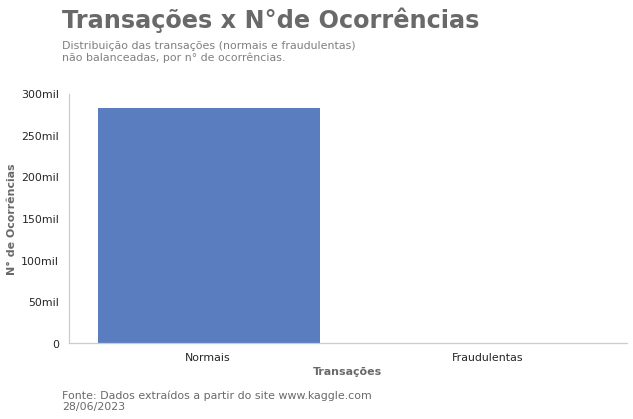

In [ ]:
# Passando as informações do tamanho da figura e resolução
fig , ax = plt.subplots(figsize = (10,4.5), dpi=72)

# Configurações do gráfico de barras
sns.barplot (data = df_notbal, x="Transações", y="N° de Ocorrências",
             palette ="muted")

# Título
ax.text(-0.525, 380000, "Transações x N°de Ocorrências",
        fontsize=24, color = "dimgray", fontweight="bold")

# Subtítulo
ax.text(-0.525, 340000,"Distribuição das transações (normais e fraudulentas) \nnão balanceadas, por n° de ocorrências.",
        fontsize=11, color="gray")

# Nome dos eixos(x,y)
plt.xlabel("Transações", fontsize=11, color="dimgray", fontweight="bold")
plt.ylabel("N° de Ocorrências", fontsize=11, color="dimgray", fontweight="bold")

# Comfiguração yticks
plt.yticks(ticks = range(0, 350000, 50000),
      labels =["0", "50mil","100mil", "150mil", "200mil", "250mil", "300mil"])

# Rodapé
ax.text(-0.525, -80000,"Fonte: Dados extraídos a partir do site www.kaggle.com\n28/06/2023",
        fontsize=11, color="dimgray")

# Deixa apenas visível o eixo x e y do gráfico
sns.despine()

# Retira as grades do gráfico
plt.grid(visible=False)

# Plota o gráfico
plt.show()


### Métricas de Avaliação que Foram Usadas  
Para avaliar o desempenho dos modelos preditivos, foram usadas as seguintes métricas de avaliação:  
  


* **Matriz de Confusão:** A matriz de confusão permite visualizar facilmente quantos exemplos foram classificados corretamente e erroneamente em cada classe, que ajuda a entender se o modelo está favorecendo uma classe em detrimento da outra.
<p align=center>
<img src="https://miro.medium.com/max/1400/1*j0TSVygS7ZPfK-lZkojNcQ.png" width="60%"></p>

* **Acurácia /Accuracy :** A acurácia nos diz quantos de nossos exemplos foram de fato classificados corretamente, independente da classe. Esta métrica é definida pela razão entre o que o modelo acertou e todos os exemplos. ``Apesar dessa métrica ser simples, de fácil uso e interpretável, ela muitas vezes não é adequada na prática, principalmente quando há dados desbalanceados.``
<p align=center>
<img src="https://miro.medium.com/max/1400/1*FvMtz5kCu-GOI3GSgi6k4Q.png" width="60%"></p>

* **Revocação / Recall :** Também denominado como sensibilidade ou taxa de verdadeiro positivo (TPR). Ela é definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e a quantidade de exemplos que são de fato positivos.
``A revocação busca responder a seguinte pergunta: de todos os exemplos que são positivos, quantos foram classificados corretamente como positivos?``

<p align=center>
<img src="https://miro.medium.com/max/1400/1*fqZ1ymVGGSA5fbqYrf1t1Q.png" width="60%"></p>

* **Curva ROC :**Ela é construída medindo a Taxa de Falso Positivo (FPR — False Positive Rate) e a Taxa de Verdadeiro Positivo (TPR — True Positive Rate) para cada limiar de classificação possível. Importante destacar que, quanto mais próxima a curva estiver do canto superior esquerdo, maior será a área sob a curva e melhor será o modelo.

<p align=center>
<img src="https://miro.medium.com/max/1400/1*MS_hz2JK9x5rDtpPH5KRuA.png" width="60%"></p>

<p align=center>
<img src="https://miro.medium.com/max/1400/1*yjl3--Qj8It_mtxQ8NKLow.png" width="50%"></p>





### Realizando o Balanceamento dos Dados de Treino

Para realizar o balanceamento foi utilizado a técnica **RadomUnderSampler**. Ela extrai um subconjunto aleatório da classe majoritária, **preservando as características da classe minoritária**, sendo ideal para situações onde você tem grandes volumes de dados, como é o caso.

In [ ]:
# Usando a técnica under-sampling para fazer o balanceamento dos dados

# Instanciando a técnica under-sampling
under = RandomUnderSampler()

# Aplicando a técnica
X_rus, y_rus = under.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

0    355
1    355
Name: Class, dtype: int64


In [ ]:
# Criando um data frame com os dados balanceados
df_yesbal = {"Transações" :["Normais", "Fraudulentas"], "Estado": ["0","1"],
             "N° de Ocorrências": [355,355]}

df_yesbal = pd.DataFrame(df_yesbal)
df_yesbal

,Transações,Estado,N° de Ocorrências
0,Normais,0,355
1,Fraudulentas,1,355


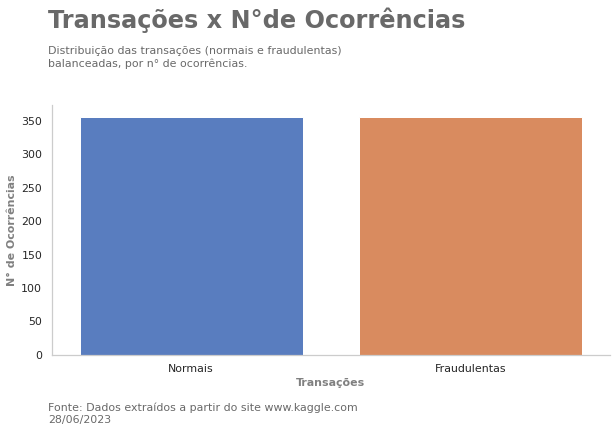

In [ ]:
# Passando as informações do tamanho da figura e resolução
ax,fig = plt.subplots(figsize=(10,4.5), dpi=72)

# Configurações do gráfico de barras
sns.barplot(data = df_yesbal, x="Transações", y="N° de Ocorrências",
            palette="muted")

# Título
ax.text(0.12, 1.12,"Transações x N°de Ocorrências",
fontsize=24, color = "dimgray", fontweight="bold")

# Subtítulo
ax.text(0.12, 1,"Distribuição das transações (normais e fraudulentas) \nbalanceadas, por n° de ocorrências.",
        fontsize=11, color = "dimgray")

# Nome dos eixos(x,y)
plt.xlabel("Transações", color="gray", fontsize=11, fontweight="bold")
plt.ylabel("N° de Ocorrências", color="gray", fontsize=11, fontweight="bold")

# Rodapé
ax.text(0.12, -0.1,"Fonte: Dados extraídos a partir do site www.kaggle.com\n28/06/2023",
        fontsize=11, color="dimgray")

# Retirando a grade dos gráfico
plt.grid(visible=False)

# Deixando as linhas apenas nos eixos x e y
sns.despine()

# Plota o gráfico
plt.show()


## Construindo o Modelo de Machine Learning

 ### Realizando as Previsões ,com os Dados de **Treino Desbalanceados**, em Cima dos Dados de **Validação**

 A seguir, foi construído um modelo a partir dos **dados desbalanceados**. O propósito foi de ,demostrar na prática, as explanações feitas anteriormente sobre o desequilíbrio dos dados e suas consequências. Vale a pena lembrar, que essa previsão foi realizada em cima dos **dados de validação**.

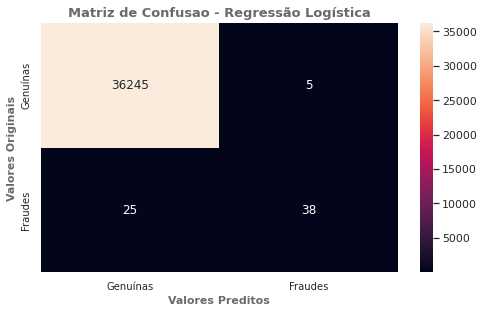

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     36250
           1     0.8837    0.6032    0.7170        63

    accuracy                         0.9992     36313
   macro avg     0.9415    0.8015    0.8583     36313
weighted avg     0.9991    0.9992    0.9991     36313

Acurácia: 99.92%
Recall: 60.32%
AUC: 80.15%


In [ ]:

# 1° Instanciando o modelo
model =LogisticRegression(max_iter=2000)

# 2° Treinando o modelo de Regressão Logistica
model.fit(X_train,y_train)

# 3° Fazendo as previsões em cima dos dados de validação
y_pred = model.predict(X_val)

# Criando uma variável com os dados para a matrix de confusão
matriz_confusao_1 = confusion_matrix(y_val, y_pred)

# Passando as informações do tamanho da figura e resolução
fig , ax = plt.subplots(figsize = (8,4.5), dpi=72)

# Configurando a matrix de confusão
sns.heatmap(matriz_confusao_1, annot=True, fmt='g', ax = ax)

# Nome dos eixos(x,y)
plt.xlabel("Valores Preditos", fontsize=11, color="dimgray", fontweight="bold")
plt.ylabel("Valores Originais", fontsize=11, color="dimgray", fontweight="bold")

# Título
ax.set_title('Matriz de Confusao - Regressão Logística',fontsize=13,
             color="dimgray", fontweight="bold")

# Adicionando os nomes das transações para valores preditivos e originais
plt.xticks(ticks = [0.5,1.5], labels =["Genuínas", "Fraudes"],fontsize=10)
plt.yticks(ticks = [0.5,1.5], labels =["Genuínas","Fraudes"],fontsize=10)

#Plotando o gráfico
plt.show()

# Imprimindo o relatório de classificação
print("Relatório de Classificação: \n",
      classification_report(y_val, y_pred, digits=4))

# Imprimindo a acurácia do modelo
acur_desb_val = (accuracy_score(y_val, y_pred)*100).round(2)
print("Acurácia: {}%".format(acur_desb_val))

# Imprimindo Recall
recall_desb_val = (recall_score(y_val, y_pred)*100).round(2)
print("Recall: {:.2f}%".format(recall_desb_val))

# Imprimindo a área sob a curva
auc_desb_val = (roc_auc_score(y_val, y_pred)*100).round(2)
print("AUC: {}%".format(auc_desb_val))

 ### Realizando as Previsões ,com os Dados de **Treino Balanceados**, em Cima dos Dados de **Validação**

Nessa etapa, foi seguido todo o passo a passo do algoritmo anterior para realizar as previsões em cima dos **dados de validação**. Porém, agora, com os dados devidamente **balanceados**. Os resultados podem ser visto a seguir:

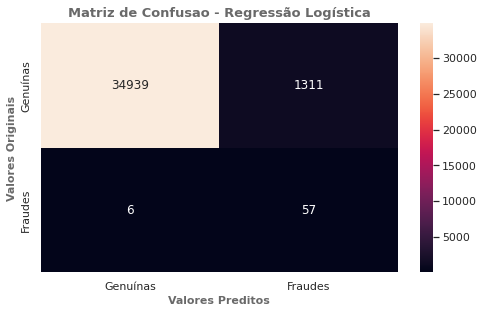

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9638    0.9815     36250
           1     0.0417    0.9048    0.0797        63

    accuracy                         0.9637     36313
   macro avg     0.5207    0.9343    0.5306     36313
weighted avg     0.9982    0.9637    0.9799     36313

AUC: 96.37%
AUC: 93.43%
Recall: 90.48%


In [ ]:
# 1°Treinando o modelo de Regressão Logistica (OBS: O modelo já foi instanciando anteriormente)
model.fit(X_rus,y_rus)

# 2° Fazendo as previsões do modelo
y_pred = model.predict(X_val)

# Criando uma variável com os dados para a matrix de confusão
matriz_confusao_2 = confusion_matrix(y_val, y_pred)

# Passando as informações do tamanho da figura e resolução
fig , ax = plt.subplots(figsize = (8,4.5), dpi=72)

# Configurando a matrix de confusão
sns.heatmap(matriz_confusao_2, annot=True, fmt='g', ax = ax)

# Nome dos eixos(x,y)
plt.xlabel("Valores Preditos", fontsize=11, color="dimgray", fontweight="bold")
plt.ylabel("Valores Originais", fontsize=11, color="dimgray", fontweight="bold")

# Título
ax.set_title('Matriz de Confusao - Regressão Logística',fontsize=13,
             color="dimgray", fontweight="bold")

# Adicionando os nomes das transações para valores preditivos e originais
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])

#Plotando o gráfico
plt.show()

# Imprimindo relatório de classificação
print("Relatório de Classificação: \n",classification_report(y_val, y_pred, digits=4))

# Imprimindo a acurácia do modelo
acur_bal_val = (accuracy_score(y_val, y_pred)*100).round(2)
print("AUC: {}%".format(acur_bal_val))

# Imprimindo a área sob a curva
auc_bal_val= (roc_auc_score(y_val, y_pred)*100).round(2)
print("AUC: {:.2f}%".format(auc_bal_val))

# Imprimindo Recall
recall_bal_val = (recall_score(y_val, y_pred)*100).round(2)
print("Recall: {:.2f}%".format(recall_bal_val))



 ### Realizando as Previsões ,com os Dados de **Treino Balanceados**, em Cima dos Dados de **Testes**
Depois de validar o modelo e perceber seu bom resultado com os dados de treino balanceados, foi decidido verificar seu desempenho diante dos dados de testes. Dito isso, foi feita as previsões obtendo os seguintes desfechos:

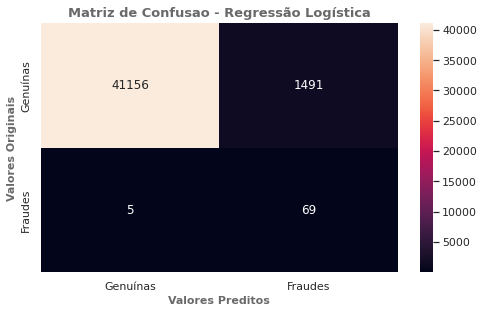

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9999    0.9650    0.9821     42647
           1     0.0442    0.9324    0.0845        74

    accuracy                         0.9650     42721
   macro avg     0.5221    0.9487    0.5333     42721
weighted avg     0.9982    0.9650    0.9806     42721

Acurácia: 96.50%
AUC: 94.87%
Recall: 93.24%


In [ ]:
# 1° Separando as labels da varíavel alvo (X_teste,y_teste)
X_testes = df_teste_pdn.drop("Class", axis=1)
y_testes = df_teste_pdn["Class"]

# 2° Treinando o modelo
model.fit(X_rus, y_rus)

# 3° Fazendo as previsões em cima dos dados de testes
y_pred = model.predict(X_testes)

# Criando uma variável com os dados para a matrix de confusão
matriz_confusao_3 = confusion_matrix(y_testes, y_pred)

# Passando as informações do tamanho da figura e resolução
fig , ax = plt.subplots(figsize = (8,4.5), dpi=72)

# Configurando a matrix de confusão
sns.heatmap(matriz_confusao_3, annot=True, fmt='g', ax = ax)


# Nome dos eixos(x,y)
plt.xlabel("Valores Preditos", fontsize=11, color="dimgray", fontweight="bold")
plt.ylabel("Valores Originais", fontsize=11, color="dimgray", fontweight="bold")

# Título
plt.title('Matriz de Confusao - Regressão Logística',fontsize=13,
          color="dimgray", fontweight="bold")

# Adicionando os nomes das transações para valores preditivos e originais
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])

# Plotando o gráfico
plt.show()

# Imprimindo relatório de classificação
print("Relatório de Classificação: \n", classification_report(y_testes, y_pred,digits=4))

# Imprimindo a acurácia do modelo
acur_bal_testes= (accuracy_score(y_testes, y_pred)*100).round(2)
print("Acurácia: {:.2f}%".format(acur_bal_testes))

# Imprimindo a área sob a curva
auc_bal_testes = (roc_auc_score(y_testes, y_pred)*100).round(2)
print("AUC: {:.2f}%".format(auc_bal_testes))

# Imprimindo Recall
recall_bal_testes = (recall_score(y_testes, y_pred)*100).round(2)
print("Recall: {:.2f}%".format(recall_bal_testes))


## Conclusões

Como foi dito inicialmente, o objetivo deste projeto constava em construir um modelo de machine learning que tivesse um bom desempenho de VP (verdadeiros positivos). Ou seja, que fosse capaz de detectar com excelência uma transação fraudulenta. Sempre com o cuidado de não perder a performance das identificações das transações genuínas (verdadeiro negativo -VN).  
Por isso, foi avaliado as métricas de Acurácia, Recall e AUC, assim como o desempenho das transações mencionadas, considerando as seguintes situações:

1° Previsões em cima dos dados de **validação** com os dados **desbalanceados**.  

2° Previsões em cima dos dados de **validação** com os dados **balanceados**.  

3° Previsões em cima dos dados de **testes** com os dados **balanceados**.

A partir desse cenário, tornou-se possível obter as seguintes conclusões:

* Ao balancear os dados percebe-se uma melhoria na AUC e no Recall.
* As análises com os dados balanceados em cima dos dados de previsão de validação já conseguem demostrar um bom desempenho do classificador para o problema proposto.
* A premissa anterior é confirmada, quando é colocado o modelo para realizar as previsões diante dos dados de testes, resultando num aumento de identificação de transações fraudulentas (VP) - Recall e da AUC.

Importante destacar aqui, que não existe um modelo ideal com todas as métricas perfeitas. O melhor modelo é aquele que atende o objetivo de negócio. Nesse caso, apesar de existir um valor considerado de falso positivo (FP) no classificador final (3°caso), a quantidade verdadeiros positivos de(VP) foi bem satisfatória.   
O pensamento neste projeto foi o seguinte:


* **É melhor o cliente ter o cartão bloqueado devido a uma suspeita de fraude e depois ligar para o banco para resolver essa situação, do que ser uma vítima de um golpe de fato e ter prejuízos econômicos e psicológicos.**

In [ ]:
# Criando um data frame resumido para comparar os resultados finais alcançados.
metricas = {"Dados de Previsão": ["Validação", "Validação","Testes"],
            "Situação dos Dados": ["Desbalanceados",
                         "Balanceados", "Balanceados"],
            "Acurácia(%)":[acur_desb_val, acur_bal_val, acur_bal_testes],
            "AUC(%)": [auc_desb_val, auc_bal_val, auc_bal_testes],
            "Recall(%)":[recall_desb_val, recall_bal_val,recall_bal_testes]}

df_metricas = pd.DataFrame(metricas)
df_metricas=df_metricas.set_index("Dados de Previsão")
df_metricas


,Situação dos Dados,Acurácia(%),AUC(%),Recall(%)
Dados de Previsão,,,,
Validação,Desbalanceados,99.92,80.15,60.32
Validação,Balanceados,96.37,93.43,90.48
Testes,Balanceados,96.50,94.87,93.24


## Referências

[Febraban Tech](https://febrabantech.febraban.org.br/temas/meios-de-pagamento/pix-e-o-meio-de-pagamento-mais-usado-no-brasil-em-2022-ted-lidera-em-valores-transacionados)  
[Modalmais](https://www.modalmais.com.br/blog/fraude-de-cartao-de-credito/)

[USP](https://edisciplinas.usp.br/pluginfile.php/3769787/mod_resource/content/1/09_RegressaoLogistica.pdf)  

[Amazon](https://aws.amazon.com/pt/what-is/logistic-regression/)  
[Statplace](https://site.statplace.com.br/blog/analise-de-componentes-principais/)  

[Sigmoidal.ai](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)  
[Kunumi](https://www.kunumi.com/2022/05/18/metricas-de-avaliacao-em-machine-learning-classificacao/)  
[Towards Data Science](https://towardsdatascience.com/data-leakage-in-machine-learning-how-it-can-be-detected-and-minimize-the-risk-8ef4e3a97562)  
[DataScientest](https://datascientest.com/en/data-leakage-definition-and-prevention)  
[inside BigData](https://insidebigdata.com/2014/11/26/ask-data-scientist-data-leakage/)


